# Orders Dataset - Analysis

In [44]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
# import order training set
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=False)


## Inspect Features

In [4]:
# Get summary stats for each column

orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000
mean,12.564574,23.747123,0.774420,0.589061,0.100539,4.142237,1.142598,1.013968,136.895781,22.780658
std,9.542359,8.762100,4.747827,0.492007,0.300719,1.296559,0.540014,0.123772,208.701803,21.532648
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.771296,18.337187,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.850000
50%,10.225243,23.235741,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.170000
75%,15.732506,28.416094,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.020000
max,209.628611,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97007 entries, 0 to 97014
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            97007 non-null  object 
 1   wait_time           97007 non-null  float64
 2   expected_wait_time  97007 non-null  float64
 3   delay_vs_expected   97007 non-null  float64
 4   order_status        97007 non-null  object 
 5   dim_is_five_star    97007 non-null  int64  
 6   dim_is_one_star     97007 non-null  int64  
 7   review_score        97007 non-null  int64  
 8   number_of_products  97007 non-null  int64  
 9   number_of_sellers   97007 non-null  int64  
 10  price               97007 non-null  float64
 11  freight_value       97007 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 9.6+ MB


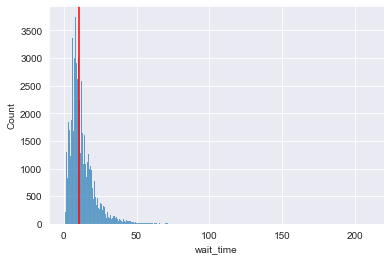

In [6]:
#histograms
# Seaborn - 'wait_time'
sns.set_style('darkgrid')
sns.histplot(data=orders['wait_time'])
median = orders['wait_time'].median()
plt.axvline(median, color='red');

'wait_time' is heavily skewed to the right indicating pull from outliers. 

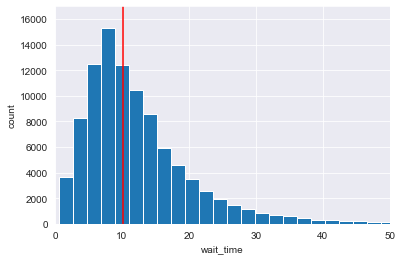

In [7]:
# Matplotlib - 'wait_time'
plt.hist(orders['wait_time'], bins=100)
plt.xlabel('wait_time')
plt.ylabel('count')
plt.xlim(0,50)
plt.ylim(0,17000)
median = orders['wait_time'].median()
plt.vlines(x=median, ymin=0, ymax=17000, color='red');

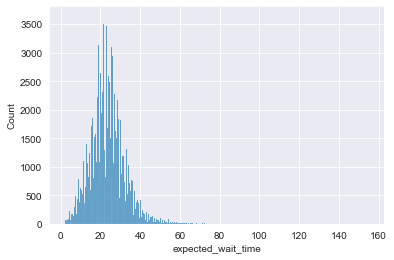

In [8]:
# histogram - 'expected_wait_time'
sns.histplot(orders['expected_wait_time']);

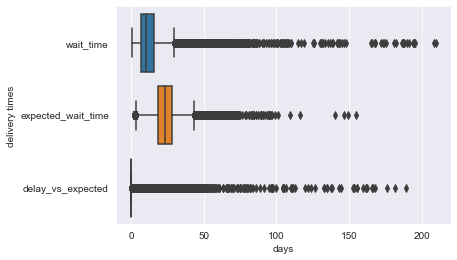

In [9]:
# Boxplots to compare distribution of variables on same scale
# 'wait_time', 'expected_wait_time', 'delay_vs_expected' units are in days

# Create Horizontal boxplots

# put dataframe into long format
orders_long = orders[['wait_time', 'expected_wait_time', 'delay_vs_expected']].melt(var_name='delivery times', value_name='days')

sns.boxplot(data=orders_long, y='delivery times', x='days');



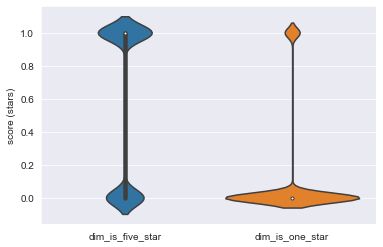

In [10]:
#Create boxplots for review-related columns: 'dim_is_five_star', 'dim_is_one_star'

sns.violinplot(data=orders[['dim_is_five_star', 'dim_is_one_star']])
plt.ylabel('score (stars)');

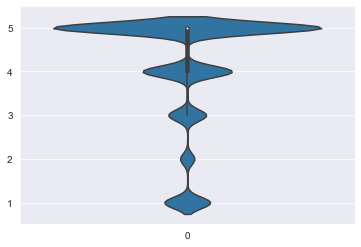

In [11]:
#Create violinplot for review-related columns: 'review_score'

sns.violinplot(data=orders['review_score']);



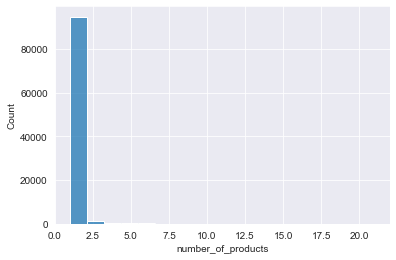

In [12]:
#Create histogram for 'number_of_products', 'number_of_sellers', 'price', 'freight_value'
sns.histplot(orders['number_of_products']);

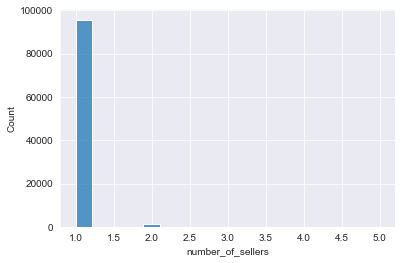

In [13]:
sns.histplot(orders['number_of_sellers']);

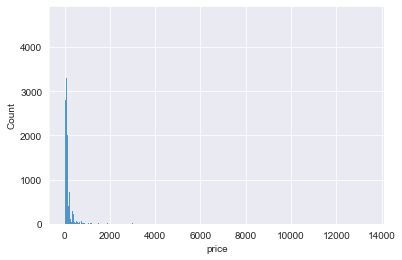

In [14]:
sns.histplot(orders['price']);

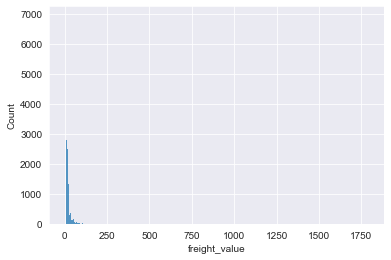

In [15]:
sns.histplot(orders['freight_value']);

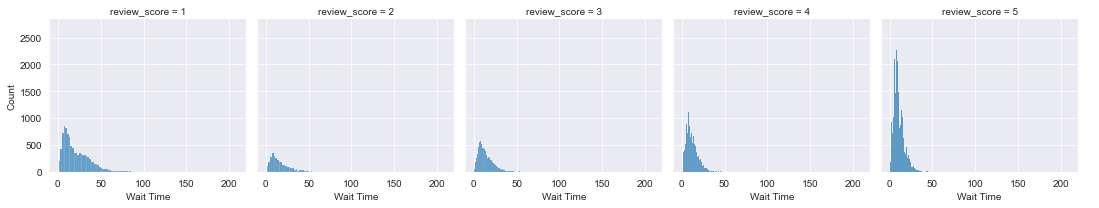

In [28]:
# Distributions for review scores

g = sns.FacetGrid(data=orders, col='review_score')
g.map(sns.histplot,'wait_time')
g.set_axis_labels('Wait Time', 'Count')
g.add_legend();


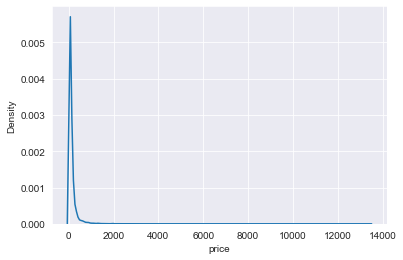

In [23]:
sns.kdeplot(orders['price']);

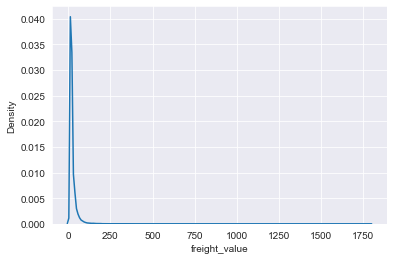

In [26]:
sns.kdeplot(orders['freight_value']);

In [ ]:
# Inspecting correlations between features and 'review_score'
# strong correlation between'wait_time' (r=-33%), 'delay_vs_expected'(r=-27%) and 'review_score'

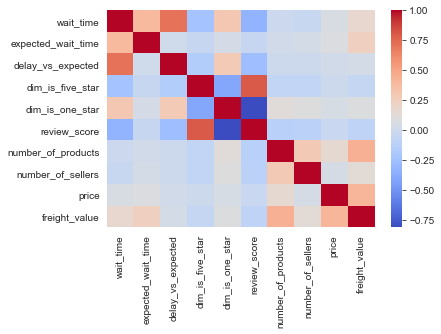

In [30]:
sns.heatmap(orders.corr(), cmap='coolwarm');

In [32]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
wait_time,1.000000,0.383318,0.707487,-0.234906,0.306431,-0.334806,-0.019350,-0.040828,0.055433,0.166979
expected_wait_time,0.383318,1.000000,0.006043,-0.050155,0.034935,-0.052191,0.016482,0.024938,0.076307,0.239346
delay_vs_expected,0.707487,0.006043,1.000000,-0.157156,0.283298,-0.271885,-0.013298,-0.017225,0.016915,0.024540
dim_is_five_star,-0.234906,-0.050155,-0.157156,1.000000,-0.400283,0.792079,-0.073427,-0.070451,-0.013972,-0.059596
dim_is_one_star,0.306431,0.034935,0.283298,-0.400283,1.000000,-0.810262,0.120563,0.101858,0.046139,0.084019
review_score,-0.334806,-0.052191,-0.271885,0.792079,-0.810262,1.000000,-0.124405,-0.116317,-0.036006,-0.091023
number_of_products,-0.019350,0.016482,-0.013298,-0.073427,0.120563,-0.124405,1.000000,0.286067,0.154001,0.439971
number_of_sellers,-0.040828,0.024938,-0.017225,-0.070451,0.101858,-0.116317,0.286067,1.000000,0.043235,0.133574
price,0.055433,0.076307,0.016915,-0.013972,0.046139,-0.036006,0.154001,0.043235,1.000000,0.411506
freight_value,0.166979,0.239346,0.024540,-0.059596,0.084019,-0.091023,0.439971,0.133574,0.411506,1.000000


# Simple Regression of 'review_score' against delivery duration

In [33]:
# take random subsample of 10,000 rows (for quicker processing)

sample = orders.sample(10000, random_state=7)
sample.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
67330,e271431ad37021b0e445c4f01a6ff83c,22.325845,32.455417,0.0,delivered,1,0,5,1,1,104.9,43.14
60554,46aecd246f390bf2157edfeed11b5433,19.372650,42.599664,0.0,delivered,1,0,5,1,1,94.9,31.33
21132,cac247cece621e1bc64748d44331d22d,30.081505,62.476343,0.0,delivered,1,0,5,1,1,249.9,23.87
30197,b8aea51136617c5b9e79b074849b9144,5.378333,11.546713,0.0,delivered,0,0,4,1,1,34.9,8.88
50168,489d87d975c0d954b27ca5482aef1e91,13.764132,30.730347,0.0,delivered,1,0,5,1,1,139.0,23.90


In [45]:
slope_wait_time, intercept, r_value, p_value, std_err = stats.linregress(sample['wait_time'],sample['review_score'])
slope_wait_time

-0.04237965877855136

In [46]:
slope_delay_vs_expected, intercept, r_value, p_value, std_err = stats.linregress(sample['delay_vs_expected'],sample['review_score'])
slope_delay_vs_expected

-0.07541752038912448

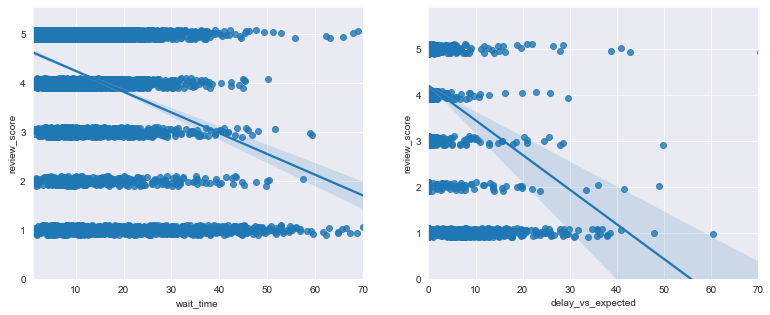

In [48]:
plt.figure(figsize=(13,5))


# Slope wait_time = -0.042: for additional day in wait time, there is a -0.042 reduction in the review_score
#(based on this sample). Blue cone indicates 95% confidence interval

plt.subplot(1,2,1)
sns.regplot(x=sample['wait_time'], y=sample['review_score'], y_jitter=0.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)


# Slope wait_time = -0.075: for additional day an order delivery exceeds its estimate there is a -0.075 reduction in the review_score
#(based on this sample) Blue cone indicates 95% confidence interval

plt.subplot(1,2,2)
sns.regplot(x=sample['delay_vs_expected'], y=sample['review_score'], y_jitter=0.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)
;

slope, intercept, r_value, p_value, std_err = stats.linregress(sample['wait_time'],sample['review_score'])
